In [1]:
import pandas as pd
import numpy as np
import matplotlib
import IPython.display

%matplotlib inline
matplotlib.interactive(False)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style="white", palette="muted")
from matplotlib import pyplot
from collections import Counter

features_start = 'MFCC_1 mean'
features_end = 'ZCR std dev'
pd.set_option('mode.chained_assignment', None)

BIRDS = [
    "0-Acant",
    "1-Acrid",
    "2-Alist",
    "3-Antho",
    "4-Antho",
    "5-Cacat",
    "6-Calyp",
    "7-Corvu",
    "8-Cract",
    "9-Dacel",
    "10-Eolop",
    "11-Eopsa",
    "12-Eudyn",
    "13-Grall",
    "14-Gymno",
    "15-Malur",
    "16-Manor",
    "17-Neoch",
    "18-Ocyph",
    "19-Parda",
    "20-Passe",
    "21-Phyli",
    "22-Platy",
    "23-Pycno",
    "24-Rhipi",
    "25-Rhipi",
    "26-Spilo",
    "27-Strep",
    "28-Trich",
    "29-Zoste"
]

In [3]:
def plot_class_num(data):
    pyplot.bar(Counter(data).keys(), Counter(data).values())
    pyplot.show()

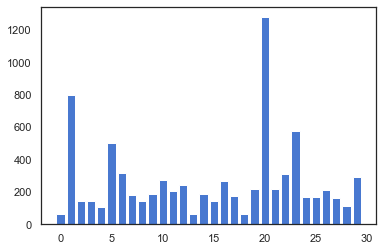

In [4]:
cases = pd.read_csv ('preprocessed_data/call_30s.csv')
cases2 = pd.read_csv ('preprocessed_data/call_60s.csv')
plot_class_num(cases['category'])

In [30]:
cases

,Unnamed: 0,filename,category,category_name,fold,MFCC_1 mean,MFCC_2 mean,MFCC_3 mean,MFCC_4 mean,MFCC_5 mean,...,MFCC_7 std dev,MFCC_8 std dev,MFCC_9 std dev,MFCC_10 std dev,MFCC_11 std dev,MFCC_12 std dev,MFCC_13 std dev,MFCC_14 std dev,ZCR mean,ZCR std dev
0,0,Acanthorhynchustenuirostris146133.mp3,0,Acanthorhynchustenuirostris,0,0.198311,0.542603,0.462339,0.593291,0.664243,...,0.587219,0.282091,0.370551,0.486595,0.352989,0.280489,0.373667,0.480962,0.313783,0.0
1,0,Acanthorhynchustenuirostris146133.mp3,0,Acanthorhynchustenuirostris,0,0.204712,0.538224,0.443012,0.589245,0.687492,...,0.582420,0.206362,0.374486,0.488200,0.361941,0.261334,0.426974,0.489827,0.726295,0.0
2,0,Acanthorhynchustenuirostris146133.mp3,0,Acanthorhynchustenuirostris,0,0.209022,0.543814,0.451782,0.581705,0.681622,...,0.668538,0.203858,0.417275,0.478378,0.385751,0.241472,0.380877,0.444328,0.384164,0.0
3,0,Acanthorhynchustenuirostris146133.mp3,0,Acanthorhynchustenuirostris,0,0.232049,0.593924,0.495290,0.532363,0.619366,...,0.736946,0.166396,0.326383,0.554711,0.269495,0.174769,0.291893,0.403137,0.526882,0.0
4,0,Acanthorhynchustenuirostris171970.mp3,0,Acanthorhynchustenuirostris,0,0.198154,0.601354,0.527527,0.520899,0.616892,...,0.229733,0.069600,0.051876,0.251037,0.056919,0.076974,0.203991,0.154679,0.430108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7914,0,Zosteropslateralis98441.mp3,29,Zosteropslateralis,29,0.200051,0.589606,0.524983,0.530851,0.627172,...,0.362496,0.145382,0.318008,0.210831,0.298645,0.156838,0.293942,0.295868,0.106549,0.0
7915,0,Zosteropslateralis98441.mp3,29,Zosteropslateralis,29,0.198702,0.592521,0.527742,0.530106,0.622966,...,0.351370,0.160509,0.303909,0.187953,0.313877,0.133789,0.302525,0.262855,0.075269,0.0
7916,0,Zosteropslateralis98441.mp3,29,Zosteropslateralis,29,0.254145,0.607638,0.526806,0.535813,0.637455,...,0.456893,0.160877,0.387226,0.279886,0.333350,0.216372,0.341028,0.380592,0.093842,0.0
7917,0,Zosteropslateralis98441.mp3,29,Zosteropslateralis,29,0.201315,0.598962,0.531309,0.524804,0.620132,...,0.281742,0.114959,0.240671,0.177809,0.235894,0.124817,0.216302,0.254134,0.054741,0.0


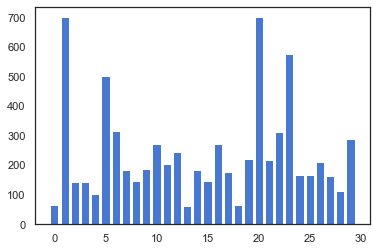

In [5]:
from imblearn.under_sampling import RandomUnderSampler

strategy = Counter(cases['category'])
for key, val in strategy.items():
    if strategy[key] > 700:
        strategy[key] = 700
        
rus = RandomUnderSampler(sampling_strategy=strategy, random_state=42)
x_undersample, y_undersample = rus.fit_resample(cases.loc[:, features_start:features_end], cases['category'])
x_undersample, y_undersample = rus.fit_resample(x_undersample, y_undersample)
plot_class_num(y_undersample)
x_undersample['category'] = y_undersample

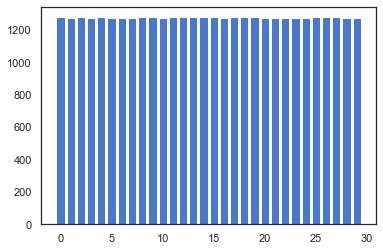

In [6]:
from imblearn.combine import SMOTETomek

smote = SMOTETomek(sampling_strategy='all', random_state=42)
x_oversample, y_oversample = smote.fit_resample(cases.loc[:, features_start:features_end], cases['category'])
plot_class_num(y_oversample)
x_oversample['category'] = y_oversample

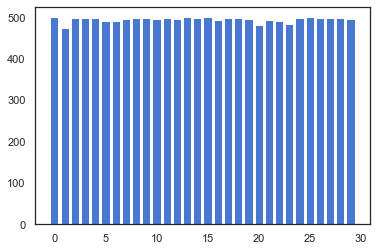

In [7]:
#A custom combination of upsampling and downsampling into 500data for each class
strategy = Counter(cases['category'])
for key, val in strategy.items():
    if strategy[key] > 500:
        strategy[key] = 500

x_custom, y_custom = RandomUnderSampler(sampling_strategy=strategy, random_state=42).fit_resample(cases.loc[:, features_start:features_end], cases['category'])
x_custom, y_custom = SMOTETomek(sampling_strategy='all', random_state=42).fit_resample(x_custom, y_custom)

plot_class_num(y_custom)
x_custom['category'] = y_custom

In [34]:
import sklearn as sk
import sklearn.ensemble
from sklearn.model_selection import train_test_split

def to_percentage(number):
    return int(number * 1000) / 10.0

def classify(cases, classifier='knn', PCA=False, debug=False):
    results = []
    class_count = len(cases['category'].unique())
    confusion = np.zeros((class_count, class_count), dtype=int)
    
    for fold in range(1, 6):
        train, test = train_test_split(cases, test_size=0.2, stratify=cases['category'])
        print(Counter(train['category']))
        classifier_name = ''

        if classifier == 'knn':
            classifier_name = 'k-NN'
            knn = sk.neighbors.KNeighborsClassifier(n_neighbors=8)
            knn.fit(train.loc[:, features_start:features_end], train['category'])
            test.loc[:, 'prediction'] = knn.predict(test.loc[:, features_start:features_end])
            
        if classifier == 'rf':
            classifier_name = 'Random Forest'
            rf = sk.ensemble.RandomForestClassifier(n_estimators=500, random_state=20150420)
            rf.fit(train.loc[:, features_start:features_end], train['category'])
            test.loc[:, 'prediction'] = rf.predict(test.loc[:, features_start:features_end])
            
        if classifier == 'svm':
            classifier_name = 'Support Vector Machine (SVM)'
            svm = sk.svm.SVC(C=0.1, kernel='rbf', random_state=20150420)
            svm.fit(train.loc[:, features_start:features_end], train['category'])
            test.loc[:, 'prediction'] = svm.predict(test.loc[:, features_start:features_end])

        accuracy = np.sum(test['category'] == test['prediction']) / float(len(test['category']))
        results.append(accuracy)
        confusion_current = sk.metrics.confusion_matrix(test['category'], test['prediction'])
        confusion = confusion + confusion_current
        
        print('Classifying fold {0} with {1} classifier. Accuracy: {2}%'.format(fold, classifier_name, to_percentage(accuracy)))
        if debug:
            print('Confusion matrix:\n', confusion_current, '\n')
        
    print('Average accuracy: {0}%\n'.format(to_percentage(np.mean(results))))
    return confusion, results

def pretty_confusion(confusion_matrix, cases, css_classes=['diagonal', 'cell_right'], raw=False, save=False):
    confusion_matrix = confusion_matrix * 1000 / np.sum(confusion_matrix, axis=1) / 10.0
    confusion_matrix_heatmap = sb.heatmap(confusion_rf, cmap="YlGnBu", vmax=100)
    confusion_matrix = np.vectorize(lambda x: '{:.2f}%'.format(x))(confusion_matrix)

    show_headers = False if 'draggable' in css_classes else True
        
    categories = sorted(cases['category'].unique())
    labels = map(lambda c: cases[cases['category'] == c]['category_name'][0:1][0], categories)
    confusion_matrix = pd.DataFrame(confusion_matrix)
    
    if save:
        confusion_matrix.to_csv("confusion_matrix_30s_smote.csv")
    
    if raw:
        return confusion_matrix_heatmap    
    else:
        return IPython.display.HTML(confusion_matrix.to_html(classes=css_classes, header=show_headers))

In [52]:
confusion_knn, accuracy_knn = classify(cases, 'knn')
confusion_rf, accuracy_rf = classify(cases, 'rf')
confusion_svm, accuracy_svm = classify(cases, 'svm')

(1584, 30) (1584,)


TypeError: fit() takes from 3 to 4 positional arguments but 5 were given

In [10]:
confusion_knn_undersample, accuracy_knn_undersample = classify(x_undersample, 'knn')
confusion_rf_undersample, accuracy_rf_undersample = classify(x_undersample, 'rf')
confusion_svm_undersample, accuracy_svm_undersample = classify(x_undersample, 'svm')

Classifying fold 1 with k-NN classifier. Accuracy: 47.3%
Classifying fold 2 with k-NN classifier. Accuracy: 48.7%
Classifying fold 3 with k-NN classifier. Accuracy: 46.4%
Classifying fold 4 with k-NN classifier. Accuracy: 47.2%
Classifying fold 5 with k-NN classifier. Accuracy: 47.7%
Average accuracy: 47.5%

Classifying fold 1 with Random Forest classifier. Accuracy: 56.7%
Classifying fold 2 with Random Forest classifier. Accuracy: 56.8%
Classifying fold 3 with Random Forest classifier. Accuracy: 55.5%
Classifying fold 4 with Random Forest classifier. Accuracy: 57.1%
Classifying fold 5 with Random Forest classifier. Accuracy: 57.2%
Average accuracy: 56.7%

Classifying fold 1 with Support Vector Machine (SVM) classifier. Accuracy: 23.7%
Classifying fold 2 with Support Vector Machine (SVM) classifier. Accuracy: 23.6%
Classifying fold 3 with Support Vector Machine (SVM) classifier. Accuracy: 22.8%
Classifying fold 4 with Support Vector Machine (SVM) classifier. Accuracy: 23.5%
Classifying

In [11]:
confusion_knn_oversample, accuracy_knn_oversample = classify(x_oversample, 'knn')
confusion_rf_oversample, accuracy_rf_oversample = classify(x_oversample, 'rf')
confusion_svm_oversample, accuracy_svm_oversample = classify(x_oversample, 'svm')

Classifying fold 1 with k-NN classifier. Accuracy: 90.3%
Classifying fold 2 with k-NN classifier. Accuracy: 90.4%
Classifying fold 3 with k-NN classifier. Accuracy: 90.5%
Classifying fold 4 with k-NN classifier. Accuracy: 90.2%
Classifying fold 5 with k-NN classifier. Accuracy: 90.2%
Average accuracy: 90.3%

Classifying fold 1 with Random Forest classifier. Accuracy: 96.3%
Classifying fold 2 with Random Forest classifier. Accuracy: 96.3%
Classifying fold 3 with Random Forest classifier. Accuracy: 96.4%
Classifying fold 4 with Random Forest classifier. Accuracy: 96.5%
Classifying fold 5 with Random Forest classifier. Accuracy: 96.3%
Average accuracy: 96.4%

Classifying fold 1 with Support Vector Machine (SVM) classifier. Accuracy: 43.5%
Classifying fold 2 with Support Vector Machine (SVM) classifier. Accuracy: 43.9%
Classifying fold 3 with Support Vector Machine (SVM) classifier. Accuracy: 44.3%
Classifying fold 4 with Support Vector Machine (SVM) classifier. Accuracy: 43.3%
Classifying

In [12]:
confusion_knn_custom, accuracy_knn_custom = classify(x_custom, 'knn')
confusion_rf_custom, accuracy_rf_custom = classify(x_custom, 'rf')
confusion_svm_custom, accuracy_svm_custom = classify(x_custom, 'svm')

Classifying fold 1 with k-NN classifier. Accuracy: 73.9%
Classifying fold 2 with k-NN classifier. Accuracy: 74.3%
Classifying fold 3 with k-NN classifier. Accuracy: 73.9%
Classifying fold 4 with k-NN classifier. Accuracy: 74.0%
Classifying fold 5 with k-NN classifier. Accuracy: 74.1%
Average accuracy: 74.0%

Classifying fold 1 with Random Forest classifier. Accuracy: 88.7%
Classifying fold 2 with Random Forest classifier. Accuracy: 87.7%
Classifying fold 3 with Random Forest classifier. Accuracy: 87.2%
Classifying fold 4 with Random Forest classifier. Accuracy: 87.7%
Classifying fold 5 with Random Forest classifier. Accuracy: 87.9%
Average accuracy: 87.8%

Classifying fold 1 with Support Vector Machine (SVM) classifier. Accuracy: 33.9%
Classifying fold 2 with Support Vector Machine (SVM) classifier. Accuracy: 33.7%
Classifying fold 3 with Support Vector Machine (SVM) classifier. Accuracy: 34.1%
Classifying fold 4 with Support Vector Machine (SVM) classifier. Accuracy: 33.9%
Classifying

In [22]:
knn_all = [accuracy_knn[0], accuracy_knn_undersample[0], accuracy_knn_oversample[0], accuracy_knn_custom[0]]
rf_all = [accuracy_rf[0], accuracy_rf_undersample[0], accuracy_rf_oversample[0], accuracy_rf_custom[0]]
svm_all = [accuracy_svm[0], accuracy_svm_undersample[0], accuracy_svm_oversample[0], accuracy_svm_custom[0]]

        0       1       2       3       4       5       6       7       8   \
0   16.92%   1.50%   0.00%   0.00%   0.00%   0.20%   0.95%   0.54%   0.00%   
1    0.00%  70.75%   0.00%   3.45%   3.81%   3.80%   1.27%   0.00%   2.07%   
2    0.00%   3.12%  31.03%   0.69%   0.00%   3.20%   1.59%   0.54%   0.00%   
3    0.00%   3.88%   2.76%  39.31%   2.86%   1.60%   2.22%   4.86%   0.00%   
4    0.00%   1.62%   0.00%   3.45%  64.76%   0.40%   0.00%   0.54%   0.69%   
5    0.00%   6.75%   0.00%   1.38%   2.86%  79.20%   0.63%   2.70%   0.00%   
6    0.00%   6.38%   0.00%   2.76%   0.00%   9.20%  43.17%   3.78%   0.00%   
7    0.00%   3.00%   0.00%   0.69%   2.86%   3.20%   0.00%  52.97%   0.00%   
8    0.00%   3.75%   0.00%   0.69%   1.90%   0.00%   0.63%   0.00%  21.38%   
9    0.00%   4.62%   0.00%   0.00%   0.00%   3.20%   0.32%   2.70%   0.69%   
10   0.00%   2.38%   0.00%   0.00%   0.00%   1.00%   0.32%   0.54%   0.00%   
11   0.00%   3.12%   0.69%   0.69%   0.00%   1.60%   0.00%   0.0

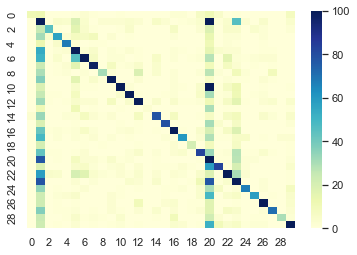

In [16]:
pretty_confusion(confusion_rf, cases, raw=False)
plt.show()

<Figure size 432x288 with 0 Axes>

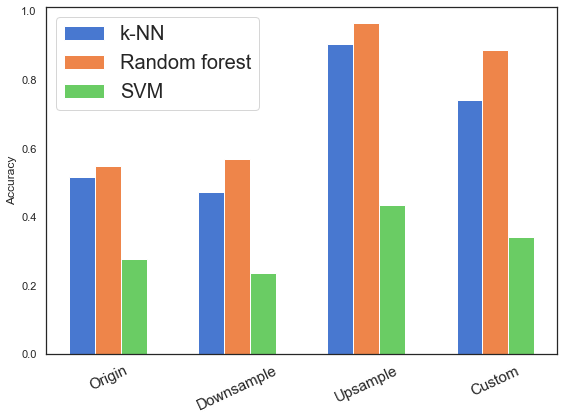

In [82]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

labels =['Origin', 'Downsample', 'Upsample', 'Custom']
def plot_accuracy_folds(knn, rf, svm):
    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 6))
    rects1 = ax.bar(x - width, knn, width, label='k-NN')
    rects1 = ax.bar(x, rf, width, label='Random forest')
    rects2 = ax.bar(x + width, svm, width, label='SVM')
    
    ax.set_ylabel('Accuracy')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.xaxis.set_tick_params(rotation=25, labelsize = 15)
    ax.legend(prop = {'size': 20})

    fig.tight_layout()
    plt.show()
#     method = [x for x in range(1, 5)]
#     accuracy = pd.DataFrame({'Method': method, 'Accuracy': knn, 'Classifier': 'k-NN'})
#     accuracy =accuracy.append(pd.DataFrame({'Method': method, 'Accuracy': rf, 'Classifier': 'Random forest'}))
#     accuracy = accuracy.append(pd.DataFrame({'Method': method, 'Accuracy': svm, 'Classifier': 'SVM'}))
    
#     sb.catplot('Method', 'Accuracy', 'Classifier', data=accuracy, kind="bar", hue_order=['k-NN', 'Random forest', 'SVM'],
#                           palette=sb.color_palette("Paired", 10))
    
#     ax = plt.gca()
#     ax.set_xticklabels(['Origin', 'Downsample', 'Upsample', 'Custom'])
#     ax.xaxis.set_tick_params(rotation = 25)
#     ax.set_xlabel('Method', labelpad=20)
#     ax.set_ylabel('Accuracy', labelpad=15)
  
plot_accuracy_folds(knn_all, rf_all, svm_all)
plt.savefig("smote_accuracy.png")

In [27]:
recalls = pd.DataFrame()

def get_recall(conf, index, headers_on=False):
    if headers_on:
        return conf.columns[index], float(conf.iloc[index, index].strip('%')) / 100.0
    else: 
        return conf.loc[index + 1, 0], float(conf.iloc[index + 1, index + 1].strip('%')) / 100.0

def extract_recall_rates(confusion_matrix, category_count, classifier, conversion_dict, category_order):
    df = pd.DataFrame()
    headers_on = '%' in confusion_matrix.iloc[1, 0]   # Check if labels are part of data or headers
    for c in range(0, category_count):
        name, recall = get_recall(confusion_matrix, c, headers_on)
        df = df.append(pd.DataFrame({'Recall rate': recall, 'Category': name, 'Category ID': category_order[name],'Classifier': classifier}, index=[0]),
                       ignore_index=True)
    return df

recalls = recalls.append(extract_recall_rates(pretty_confusion(confusion_knn, cases, raw=True), 30, 'k-NN', BIRDS, BIRDS))
recalls = recalls.append(extract_recall_rates(pretty_confusion(confusion_rf, cases, raw=True), 30, 'Random forest', BIRDS, BIRDS))
recalls = recalls.append(extract_recall_rates(pretty_confusion(confusion_svm, cases, raw=True), 30, 'SVM', BIRDS, BIRDS))

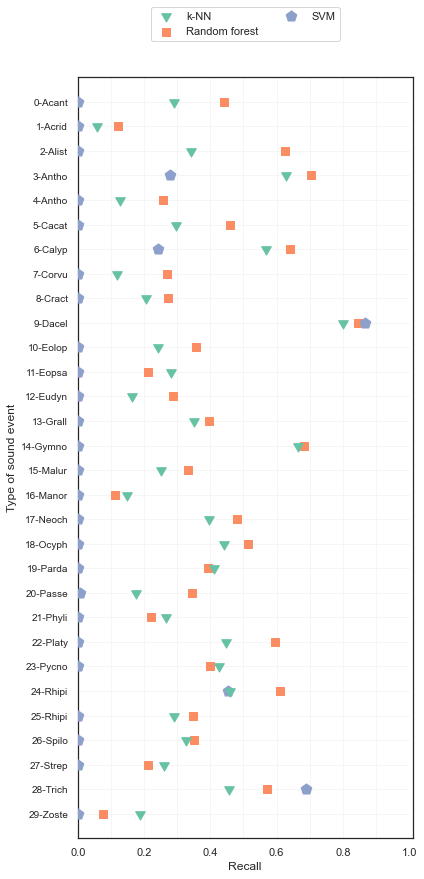

In [28]:
f, ax = plt.subplots(1, 1, figsize=(6, 14))
plots = []

def plot_classifier_recall(classifier, color_id):
    colors = sb.color_palette("Set2")
    markers = [
        (3, 0, 180), 
        (4, 0, 45),
        (5, 0, 0), 
    ]
    size = 125
    alpha = 1.0
    zorder = 100 - (color_id % 2) * 20 - color_id # ESC-10 on top of ESC-50, smaller markers on top of bigger
    y = recalls[(recalls['Classifier'] == classifier)]['Category ID'].to_numpy()
    x = recalls[(recalls['Classifier'] == classifier)]['Recall rate'].to_numpy()
    plots.append(ax.scatter(x, y, color=colors[color_id], s=size, marker=markers[color_id],
                            alpha=alpha, zorder=zorder))

plot_classifier_recall('k-NN', 0)
plot_classifier_recall('Random forest', 1)
plot_classifier_recall('SVM', 2)

ax.legend(plots, ('k-NN','Random forest','SVM'), loc='upper center', ncol=2, markerscale=1,
                  bbox_to_anchor=(0.5, 1.10))

ax.set_ylim((-1, 30))
ax.set_yticks(range(0, 30))
ax.set_yticklabels(BIRDS[::-1], fontsize=10)
ax.set_xlim((0.0, 1.01))

ax.set_ylabel('Type of sound event')
ax.set_xlabel('Recall')

for c in range(0, 50):
    ax.add_line(matplotlib.lines.Line2D((0, 1), (c, c), linewidth=1, linestyle='solid', alpha=1.0, color='whitesmoke', zorder=0))
for r in (np.arange(0, 10) / 10.0):
    ax.add_line(matplotlib.lines.Line2D((r, r), (-1, 50), linewidth=1, linestyle='solid', alpha=1.0, color='whitesmoke', zorder=0))    

plt.show()
    
# plt.savefig('figure_recall.pdf', bbox_inches='tight')